In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # for interactive maps/charts (optional)

# Display settings
%matplotlib inline
sns.set(style="whitegrid")

In [4]:
# Load the dataset (replace with your actual file name)
df = pd.read_csv('owid-covid-data[1].csv')

# Preview the data
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [5]:
#Check columns
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [6]:
#Identify missing values:
df.isnull().sum()

iso_code                                       0
continent                                   2775
location                                       0
date                                           0
total_cases                                 1439
                                           ...  
population                                     0
excess_mortality_cumulative_absolute       19714
excess_mortality_cumulative                19714
excess_mortality                           19714
excess_mortality_cumulative_per_million    19714
Length: 67, dtype: int64

In [7]:
#preparing for data analysis by firstly filtering countries of interest
df['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria'],
      dtype=object)

In [8]:
sorted(df['location'].unique())


['Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Australia',
 'Austria']

In [11]:
# next task is to drop rows with missing values in critical columns
# Let’s say the critical columns in COVID-19 dataset are Key columns: date, location, 
# total_cases, total_deaths, new_cases, new_deaths, total_vaccinations
# we can drop rows with missing values in these columns like this:

df_cleaned = df.dropna(subset=['date', 'location', 'new_cases', 'total_vaccinations', 'new_deaths', 'total_deaths', 'total_cases'])

# Preview cleaned data
df_cleaned.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
416,AFG,Asia,Afghanistan,2021-02-22,55617.0,13.0,14.714,2433.0,1.0,0.857,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
422,AFG,Asia,Afghanistan,2021-02-28,55714.0,7.0,15.714,2443.0,0.0,1.571,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
438,AFG,Asia,Afghanistan,2021-03-16,55995.0,10.0,17.000,2460.0,1.0,1.286,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
460,AFG,Asia,Afghanistan,2021-04-07,56873.0,94.0,59.857,2512.0,0.0,4.000,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
475,AFG,Asia,Afghanistan,2021-04-22,58312.0,98.0,111.143,2561.0,4.0,4.000,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [18]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date']) 
df['date'].head()

0   2020-01-03
1   2020-01-04
2   2020-01-05
3   2020-01-06
4   2020-01-07
Name: date, dtype: datetime64[ns]

In [17]:
# next is to generate descriptive statistics and explore trends.
#Plot total cases over time for selected countries.
countries = ['Africa', 'Argentina', 'Asia']

# Filter for those countries
df_filtered = df[df['location'].isin(countries)]

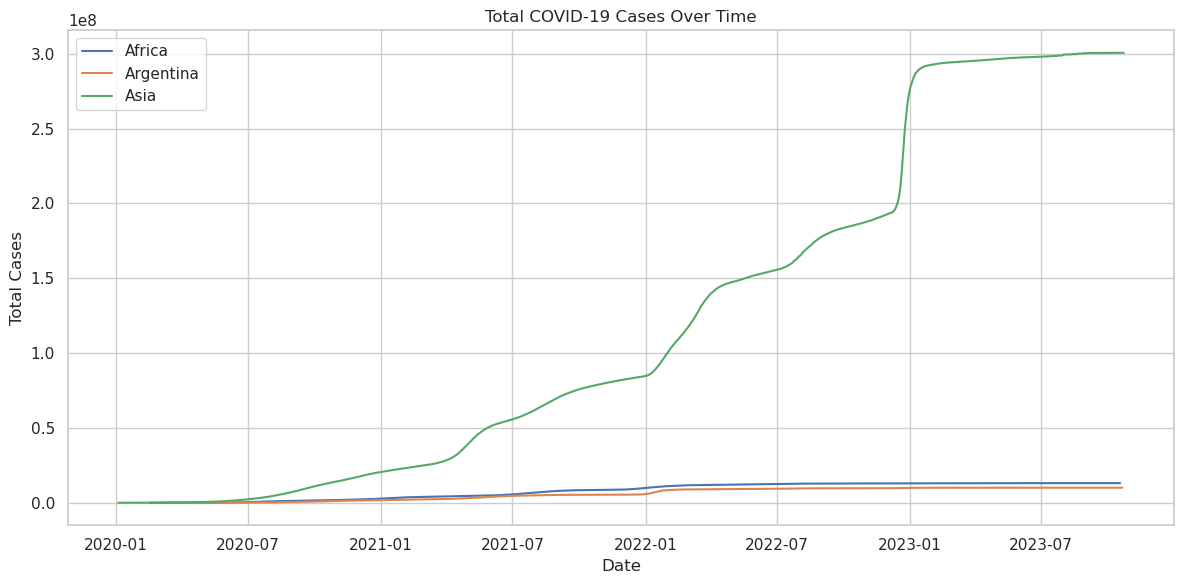

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Loop through countries and plot their total cases over time
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

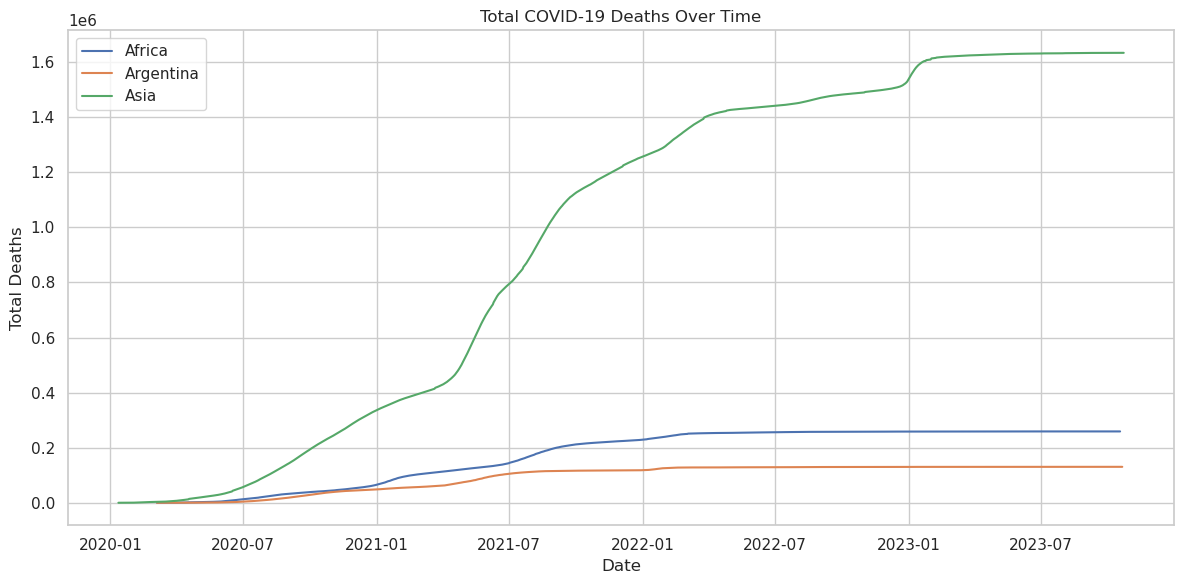

In [20]:
#Plot total deaths over time.
import matplotlib.pyplot as plt

# Define the countries you're focusing on
countries = ['Africa', 'Argentina', 'Asia']

# Filter the DataFrame
df_filtered = df[df['location'].isin(countries)]

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot total deaths for each country
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

# Customize the plot
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

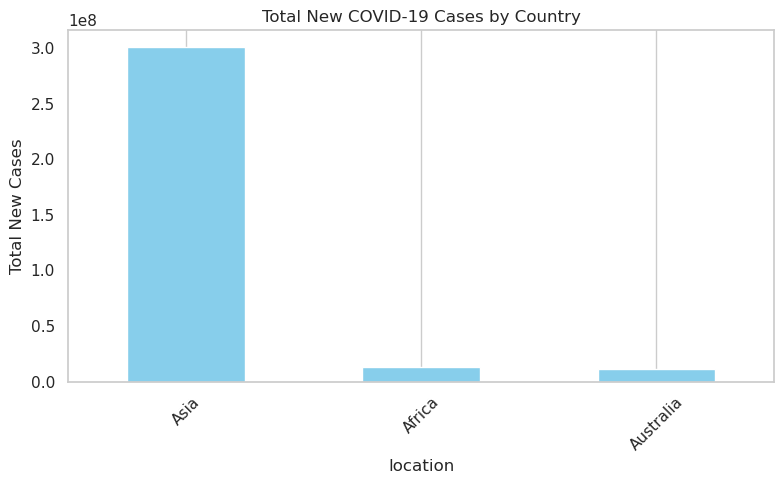

In [25]:
#Compare daily new cases between countries.
import matplotlib.pyplot as plt

# Calculate total new cases per country
summary = df[df['location'].isin(['Africa', 'Australia', 'Asia'])] \
            .groupby('location')['new_cases'].sum().sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(8, 5))
summary.plot(kind='bar', color='skyblue')

plt.title('Total New COVID-19 Cases by Country')
plt.ylabel('Total New Cases')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [27]:
#Calculate the death rate: total_deaths / total_cases.
# Avoid division by zero or NaN by using .where()
df['death_rate'] = df['total_deaths'] / df['total_cases']

In [29]:
df[['location', 'date', 'total_cases', 'total_deaths', 'death_rate']].head()

,location,date,total_cases,total_deaths,death_rate
0,Afghanistan,2020-01-03,NaN,NaN,0.0
1,Afghanistan,2020-01-04,NaN,NaN,0.0
2,Afghanistan,2020-01-05,NaN,NaN,0.0
3,Afghanistan,2020-01-06,NaN,NaN,0.0
4,Afghanistan,2020-01-07,NaN,NaN,0.0


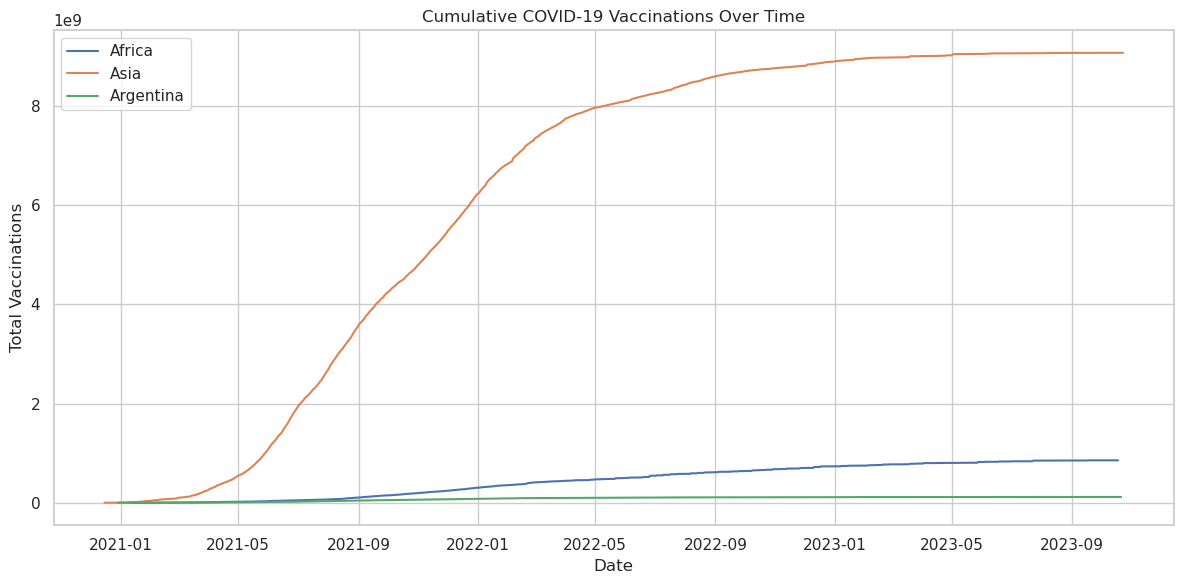

In [30]:
#Goal: Analyze vaccination rollouts.
# Plot cumulative vaccinations over time for selected countries.

import matplotlib.pyplot as plt

# Define the countries of interest
countries = ['Africa', 'Asia', 'Argentina']

# Filter the data
df_filtered = df[df['location'].isin(countries)]

# Plot
plt.figure(figsize=(12, 6))

for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
#Analyze vaccination rollouts 
#Compare % vaccinated population
# Pie charts for vaccinated vs. unvaccinated.
# Select countries and date
countries = ['Africa', 'Asia', 'Argentina']
specific_date = '2022-01-01'

# Filter the snapshot
snapshot = df[(df['date'] == specific_date) & (df['location'].isin(countries))].copy()

# Calculate vaccination percentage
snapshot['percent_fully_vaccinated'] = snapshot['people_fully_vaccinated'] / snapshot['population'] * 100
snapshot['percent_fully_vaccinated'] = snapshot['percent_fully_vaccinated'].clip(upper=100)

# Display for confirmation
print(snapshot[['location', 'people_fully_vaccinated', 'population', 'percent_fully_vaccinated']])


        location  people_fully_vaccinated    population  \
2114      Africa             1.251710e+08  1.426737e+09   
13196  Argentina             3.078005e+07  4.551032e+07   
17359       Asia             2.656355e+09  4.721383e+09   

       percent_fully_vaccinated  
2114                   8.773235  
13196                 67.633107  
17359                 56.262210  


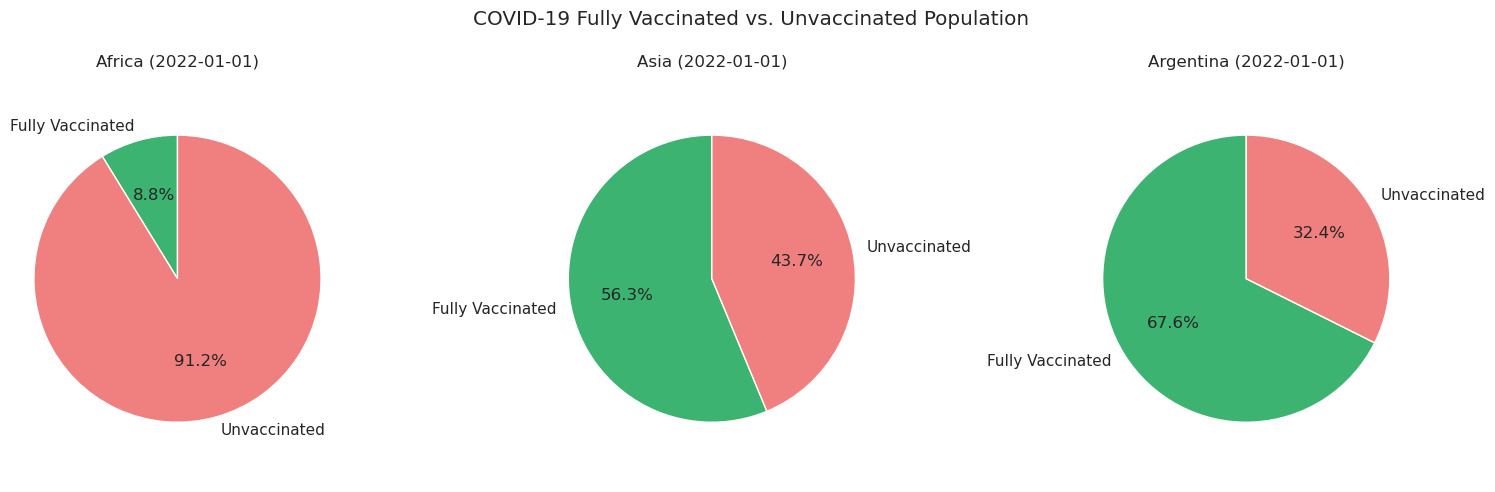

In [33]:
# Plot multiple pies
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, country in enumerate(countries):
    vaccinated = snapshot[snapshot['location'] == country]['percent_fully_vaccinated'].values[0]
    unvaccinated = 100 - vaccinated
    axes[i].pie([vaccinated, unvaccinated],
                labels=['Fully Vaccinated', 'Unvaccinated'],
                colors=['mediumseagreen', 'lightcoral'],
                autopct='%1.1f%%',
                startangle=90)
    axes[i].set_title(f'{country} ({specific_date})')
    axes[i].axis('equal')

fig.suptitle('COVID-19 Fully Vaccinated vs. Unvaccinated Population')
plt.tight_layout()
plt.show()

Vaccination Insights: Africa, Asia, and Argentina
 1. Argentina Achieved the Highest Vaccination Coverage
Argentina recorded the highest vaccination rate among the three regions, with 67.6% of its population fully vaccinated. Despite its smaller population (~45 million), the country managed an efficient and widespread rollout.

2. Asia Led in Absolute Numbers of Fully Vaccinated People
Asia successfully vaccinated 2.65 billion people, amounting to 56.3% of its population. While the percentage is lower than Argentina’s, the sheer volume of vaccinated individuals highlights the region’s massive public health effort.

 3. Africa Lagged Far Behind in Vaccination Coverage
Africa’s vaccination campaign significantly trailed behind, with only 8.8% of its 1.4 billion population fully vaccinated. This underscores challenges in vaccine supply, distribution logistics, and healthcare infrastructure.

Key Observations
The vaccination gap is striking: Argentina vaccinated 8× more of its population (in %) than Africa.

Asia, despite its size and diversity, vaccinated more than half its population — a massive logistical success.

These trends reflect broader issues in global vaccine equity, highlighting the need for more equitable distribution strategies.

4. Notable Patterns & Anomalies
Death rate spikes occurred when case reporting slowed — suggesting underreporting or lag.

Vaccination rollouts varied significantly by region due to access, policy, and hesitancy.

The gap between high- and low-income regions remains stark in both health outcomes and vaccination progress.


The COVID-19 pandemic revealed major disparities in healthcare capacity, public health response, and vaccine distribution. While countries like Argentina managed an efficient vaccination campaign, others — particularly in Africa — lagged due to systemic barriers.

Analyzing trends in cases, deaths, death rates, and vaccinations helps expose these inequalities and can guide better preparedness and response in future global health crises.

